In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv(Path('../resources/OSMI_MHIT_mostly_clean.csv')).set_index('new_id')
df

,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,mh_discussion_negative_impact,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
new_id,,,,,,,,,,,,,,,,,,,,,
1,0,26-100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,No,...,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes,"(38.0, 99.0]","(37.0, 39.0]"
2,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,"(28.0, 32.0]","(27.0, 29.0]"
3,0,6-25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,...,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always,"(32.0, 38.0]","(37.0, 39.0]"
4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
5,0,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0,100-500,1,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,...,26,female,Canada,none,Canada,none,Other,Sometimes,"(19.999, 28.0]","(25.0, 27.0]"
1004,0,500-1000,1,Yes,No,No,No,Yes,Somewhat easy,No,...,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always,"(32.0, 38.0]","(37.0, 39.0]"
1005,0,100-500,1,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,52,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes,"(38.0, 99.0]","(44.0, 99.0]"


In [13]:
#data types and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 1 to 1007
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   self_employed                          1004 non-null   int64 
 1   company_size                           1004 non-null   object
 2   tech_company                           1004 non-null   int64 
 3   mh_coverage                            1004 non-null   object
 4   mh_coverage_awareness                  1004 non-null   object
 5   mh_employer_discussion                 1004 non-null   object
 6   mh_resources_provided                  1004 non-null   object
 7   mh_anonimity                           1004 non-null   object
 8   mh_medical_leave                       1004 non-null   object
 9   mh_discussion_negative_impact          1004 non-null   object
 10  ph_discussion_negative_impact          1004 non-null   object
 11  mh_discussion_cow

In [36]:
df.describe(include='all')

,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,mh_discussion_negative_impact,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
count,1004.0,1004,1004.000000,1004,1004,1004,1004,1004,1004,1004,...,1004.000000,1004,1004,1004,1004,1004,1004,1004,1004,1004
unique,NaN,6,NaN,4,3,3,3,3,6,3,...,NaN,3,6,48,7,49,162,3,4,10
top,NaN,26-100,NaN,Yes,I am not sure,No,No,I don't know,Somewhat easy,Maybe,...,NaN,male,United States of America,none,United States of America,none,Back-end Developer,Sometimes,"(19.999, 28.0]","(34.0, 37.0]"
freq,NaN,263,NaN,510,412,708,438,649,241,427,...,NaN,722,707,297,709,295,201,540,281,134
mean,0.0,NaN,0.764940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.659363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,0.424247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.086614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Common Mental Health Disorders


In [19]:
df['yes_condition_dx'].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                         140
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                     116
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                        50
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                                                                                                 27
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention 

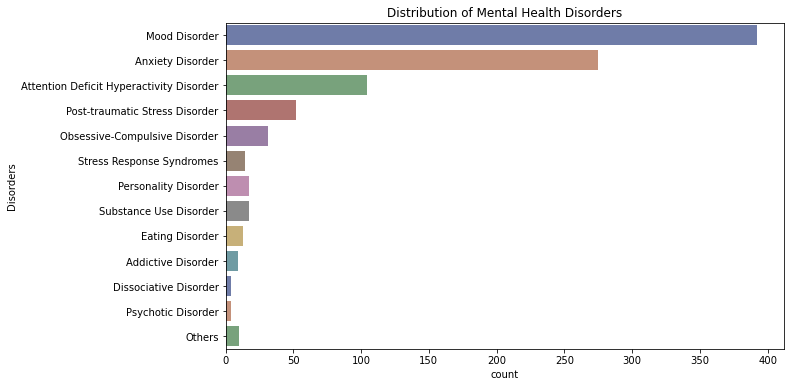

In [35]:
disorders = {}

disorderCounts = dict(df['yes_condition_dx'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

# print(tmp[0].value_counts())
plt.figure(figsize=(10, 6))
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'],palette="dark", alpha=.6,)
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

Based on the survey results the most common mental health disorder appears to be 
mood disorder,followed by anxiety disorder.

# Gender Distribution Vs Country

In [15]:
df['tech_company'].value_counts()

1    768
0    236
Name: tech_company, dtype: int64

Text(0.5, 1.0, 'Overall gender prop%')

<Figure size 1152x360 with 0 Axes>

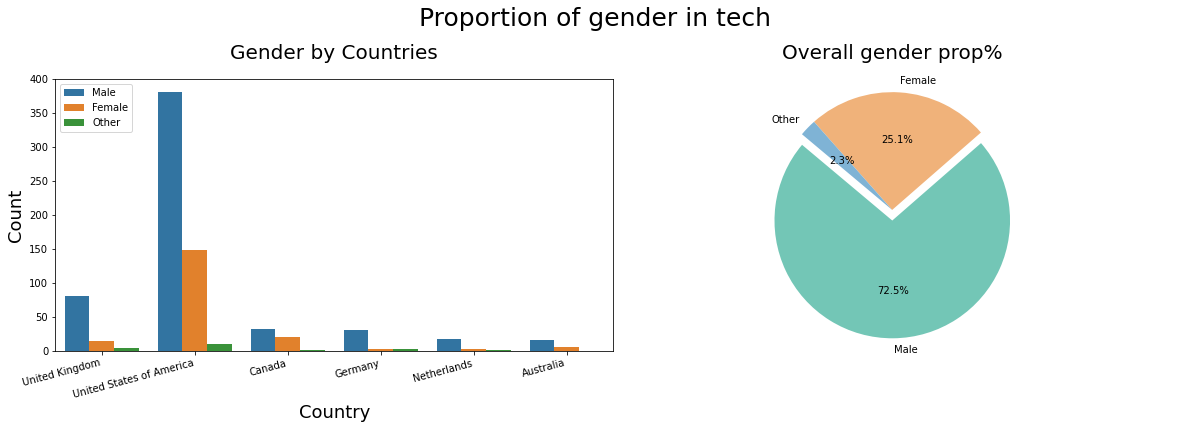

In [47]:
# Most respondents are male
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Proportion of gender in tech', fontsize = 25, y=1.08)

# Barchart
sns.countplot(x = df[df['tech_company'] == 1]['country_live'], hue = df['gender'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Gender by Countries', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Male', 'Female', 'Other']);

# Pie Chart
all_techs = df[df['tech_company'] == 1]['gender'].count()
males = df[(df['tech_company'] == 1) & (df['gender'] == 'male')]['gender'].count()
females = df[(df['tech_company'] == 1) & (df['gender'] == 'female')]['gender'].count()
other = df[(df['tech_company'] == 1) & (df['gender'] == 'nonbinary')]['gender'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.09, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 20)

In [42]:
# Pie Chart
all_techs = df[df['tech_company'] == 1]['gender'].count()
males = df[(df['tech_company'] == 1) & (df['gender'] == 'male')]['gender'].count()
females = df[(df['tech_company'] == 1) & (df['gender'] == 'female')]['gender'].count()
other = df[(df['tech_company'] == 1) & (df['gender'] == 'nonbinary')]['gender'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 20)

Text(0.5, 1.0, 'Overall gender prop%')

# Proportion of genders in tech

# Gender Distribution Vs Country

# Gender 

# Discussing Mental Health at Work